In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [67]:
# Load the dataset (assuming it's a CSV file)
data = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

# Basic information about the dataset
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [69]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [70]:
data.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [25]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [71]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [72]:
# Handle missing values
# Fill numeric columns with the median value, categorical with the mode
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = data[col].fillna(data[col].mode()[0])
    else:
        data[col] = data[col].fillna(data[col].median())

# Convert categorical features to numerical
le = LabelEncoder()
categorical_columns = ["BusinessTravel", "Department", "EducationField", "Gender", "JobRole", "MaritalStatus", "OverTime", "Over18"]
for col in categorical_columns:
    data[col] = le.fit_transform(data[col])

# Drop columns that don't add meaningful information or are constant
data.drop(["EmployeeCount", "EmployeeNumber", "Over18", "StandardHours"], axis=1, inplace=True)

# Check the cleaned data
data.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,No,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,No,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,No,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2


C:\Users\Admin\AppData\Local\Temp\ipykernel_18844\1113757729.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='JobRole', y='MonthlyIncome', data=data, palette='Set2')


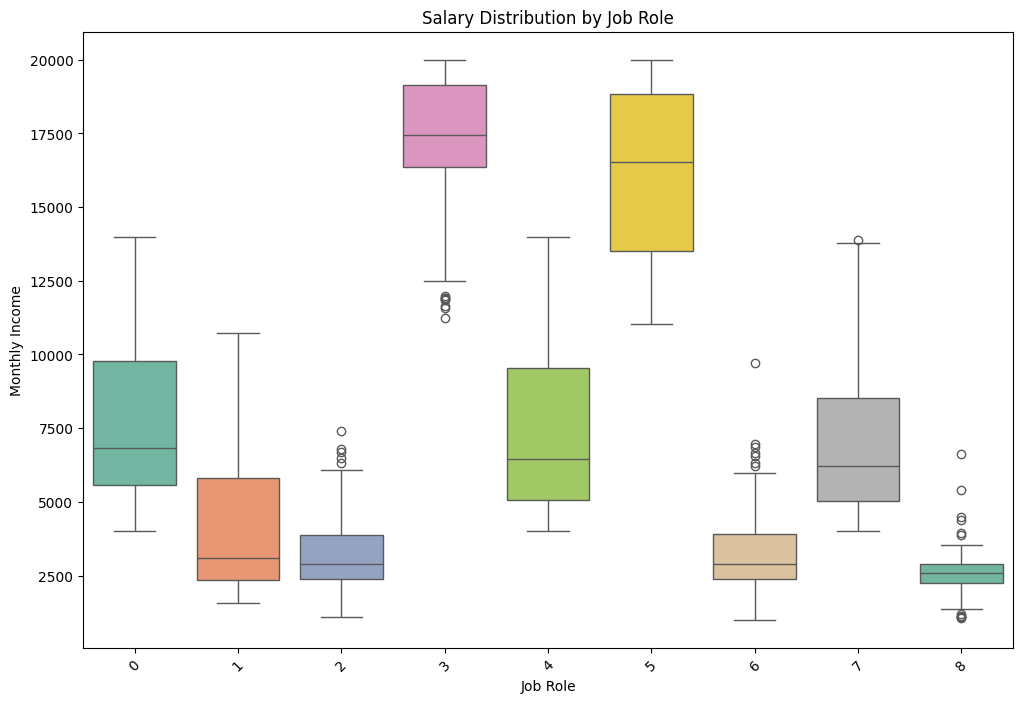

In [28]:
# Box plot of salaries by job role
plt.figure(figsize=(12, 8))
sns.boxplot(x='JobRole', y='MonthlyIncome', data=data, palette='Set2')
plt.title('Salary Distribution by Job Role')
plt.xlabel('Job Role')
plt.ylabel('Monthly Income')
plt.xticks(rotation=45)
plt.show()


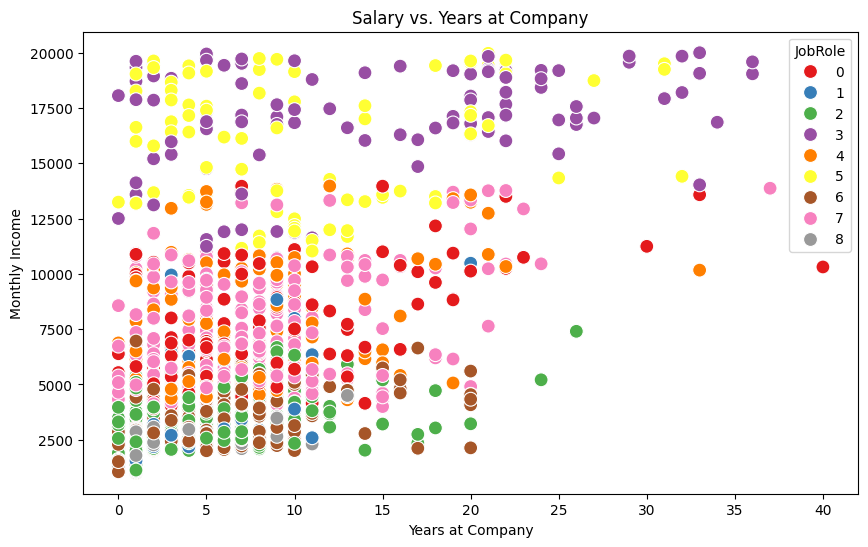

In [29]:
# Scatter plot of salary vs. years at the company
plt.figure(figsize=(10, 6))
sns.scatterplot(x='YearsAtCompany', y='MonthlyIncome', data=data, hue='JobRole', palette='Set1', s=100)
plt.title('Salary vs. Years at Company')
plt.xlabel('Years at Company')
plt.ylabel('Monthly Income')
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_18844\3653074789.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Department', y='MonthlyIncome', data=data, palette='Set3')


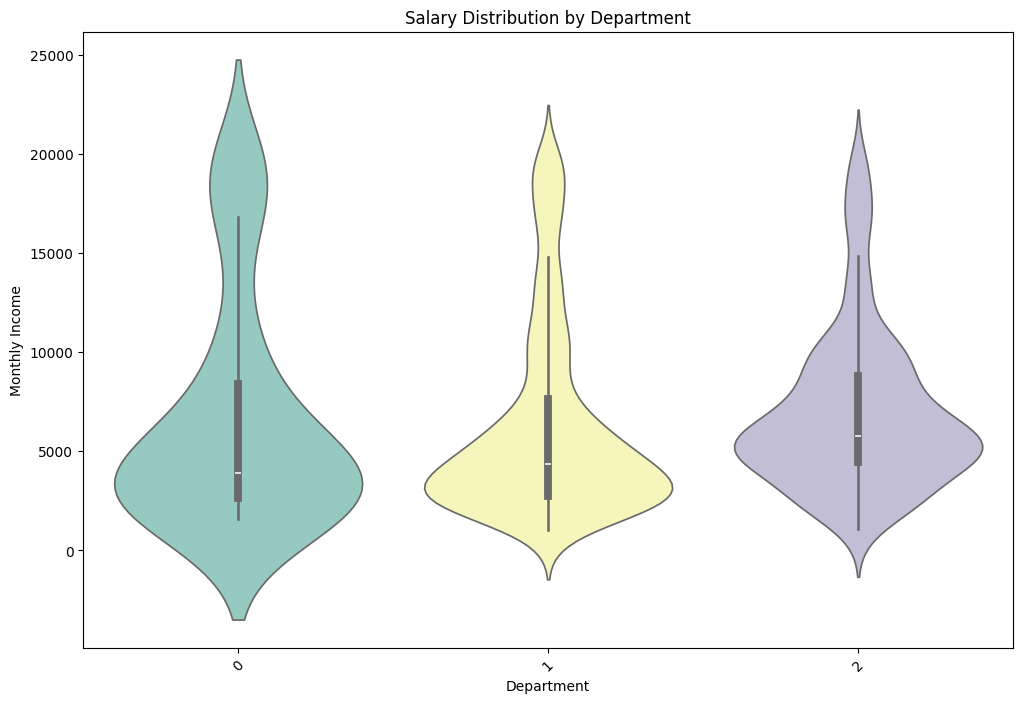

In [30]:
# Violin plot of salaries by department
plt.figure(figsize=(12, 8))
sns.violinplot(x='Department', y='MonthlyIncome', data=data, palette='Set3')
plt.title('Salary Distribution by Department')
plt.xlabel('Department')
plt.ylabel('Monthly Income')
plt.xticks(rotation=45)
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_18844\3285030326.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_salary_by_gender.index, y=avg_salary_by_gender.values, palette='Set1')


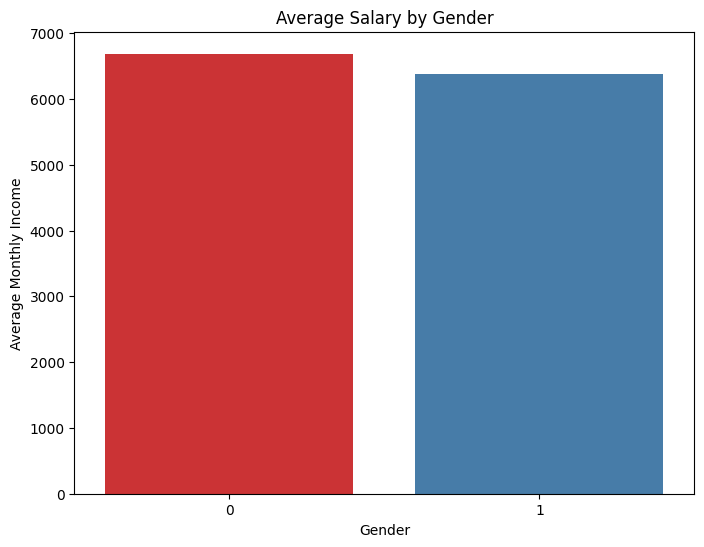

In [50]:
# Bar plot for average salary by gender
plt.figure(figsize=(8, 6))
avg_salary_by_gender = data.groupby("Gender")["MonthlyIncome"].mean()
sns.barplot(x=avg_salary_by_gender.index, y=avg_salary_by_gender.values, palette='Set1')
plt.title('Average Salary by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Monthly Income')
plt.show()


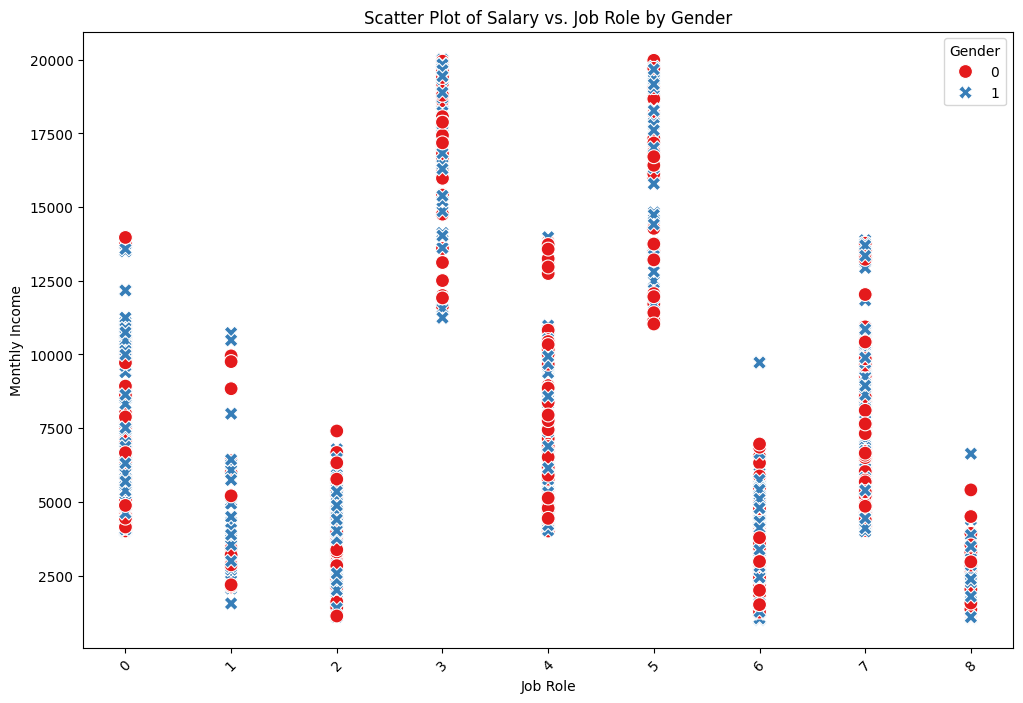

In [32]:
# Scatter plot of salary vs. job role with different colors for gender
plt.figure(figsize=(12, 8))
sns.scatterplot(x='JobRole', y='MonthlyIncome', data=data, hue='Gender', style='Gender', s=100, palette='Set1')
plt.title('Scatter Plot of Salary vs. Job Role by Gender')
plt.xlabel('Job Role')
plt.ylabel('Monthly Income')
plt.xticks(rotation=45)  # Rotate job role labels for better readability
plt.show()


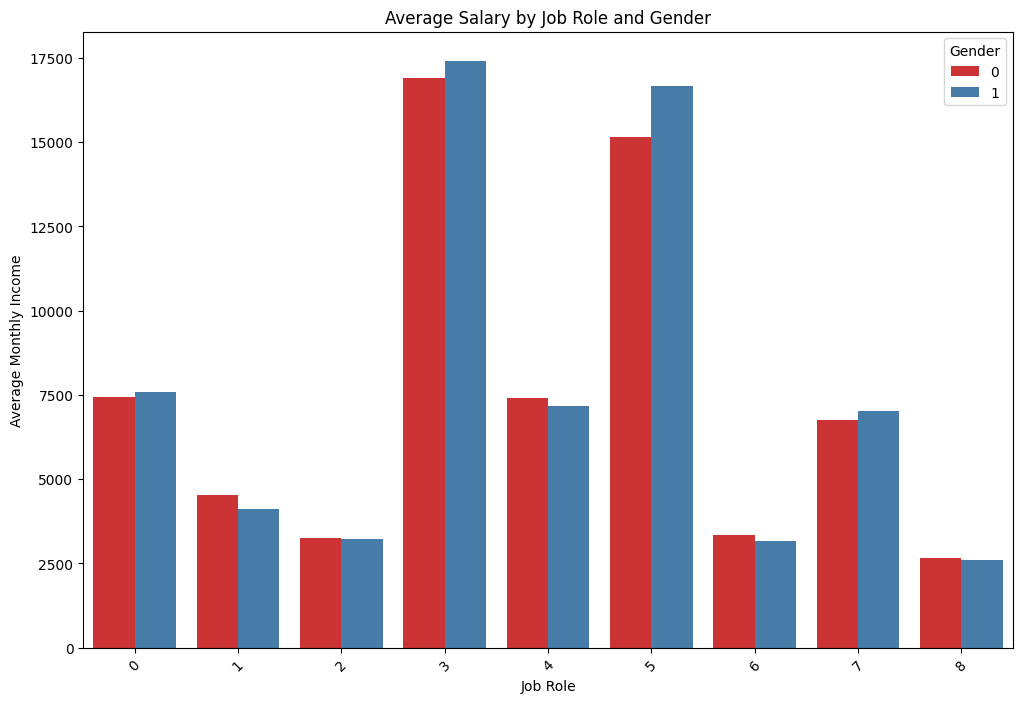

In [73]:
# Group by job role and gender to calculate the average salary
avg_salary_by_job_and_gender = data.groupby(['JobRole', 'Gender'])['MonthlyIncome'].mean().reset_index()

# Bar plot for average salary by job role and gender
plt.figure(figsize=(12, 8))
sns.barplot(x='JobRole', y='MonthlyIncome', hue='Gender', data=avg_salary_by_job_and_gender, palette='Set1')
plt.title('Average Salary by Job Role and Gender')
plt.xlabel('Job Role')
plt.ylabel('Average Monthly Income')
plt.xticks(rotation=45)  # Rotate job role labels for better readability
plt.show()


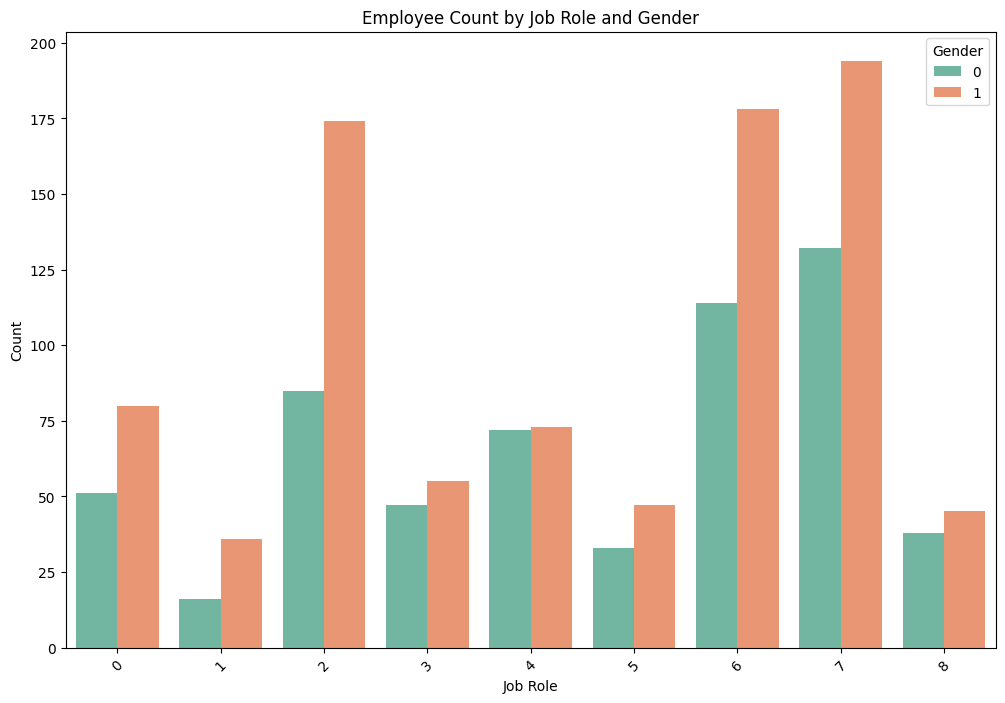

In [34]:
# Bar plot for count of employees by gender within each job role
plt.figure(figsize=(12, 8))
sns.countplot(x='JobRole', hue='Gender', data=data, palette='Set2')
plt.title('Employee Count by Job Role and Gender')
plt.xlabel('Job Role')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate job role labels for better readability
plt.show()


In [37]:
# Define features and target variable
X = data.drop("Attrition", axis=1)  # Features
y = data["Attrition"]  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

# Train a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [77]:
# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model's accuracy and other metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print(f"Confusion Matrix: \n {confusion_matrix(y_test, y_pred)}\n")

Accuracy: 0.8616780045351474
Classification Report:
               precision    recall  f1-score   support

          No       0.87      0.98      0.92       380
         Yes       0.50      0.10      0.16        61

    accuracy                           0.86       441
   macro avg       0.69      0.54      0.54       441
weighted avg       0.82      0.86      0.82       441

Confusion Matrix: 
 [[374   6]
 [ 55   6]]



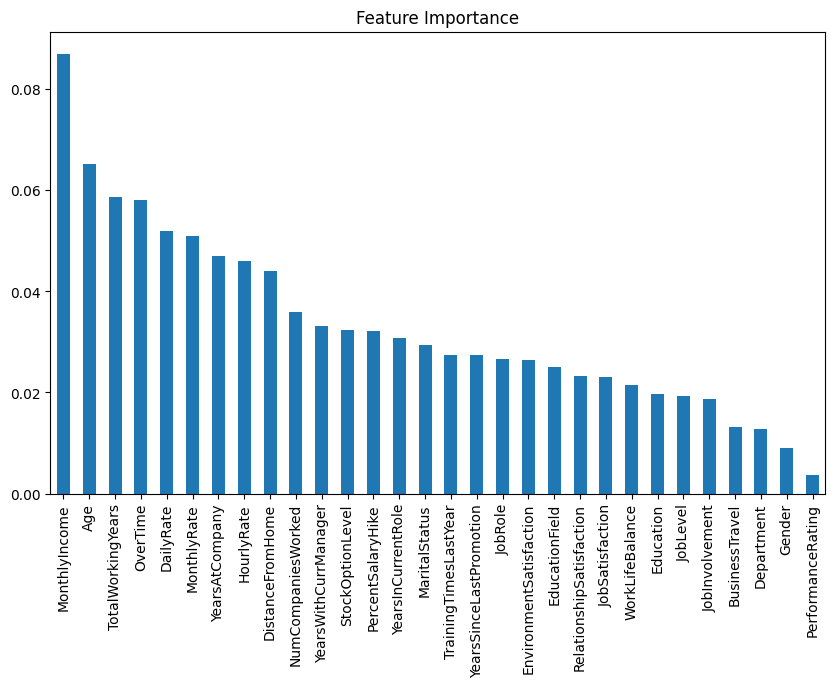

In [78]:
# Determine feature importance
feature_importance = pd.Series(model.feature_importances_, index=X_train.columns)
feature_importance.sort_values(ascending=False, inplace=True)

# Visualize feature importance
feature_importance.plot(kind="bar", figsize=(10, 6), title="Feature Importance")
plt.show()


In [79]:
from sklearn.tree import export_graphviz
import graphviz

# Select a tree to visualize (e.g., the first tree in the Random Forest)
tree_index = 0
estimator = model.estimators_[tree_index]

# Export the selected tree to Graphviz format
dot_data = export_graphviz(estimator, out_file=None,
                           feature_names=X.columns,
                           class_names=y ,
                           filled=True, rounded=True,
                           special_characters=True)

# Create a graph from the DOT data and visualize it
graph = graphviz.Source(dot_data)
graph.render("random_forest_tree", format="png", cleanup=True)  # Save as PNG
graph.view()  # View the generated tree


'random_forest_tree.pdf'